In [1]:
%matplotlib inline
from skimage.io import imread, imshow
from matplotlib.pyplot import figure

In [2]:
from leicaexperiment import Experiment
e = Experiment('data/experiment--2015_04_29_16_35_42 - Copy')

rows = e.field_rows(0,0)
cols = e.field_columns(0,0)

img1 = imread(e.image(0,0,0,0))
img2 = imread(e.image(0,0,0,1))

In [3]:
import matplotlib.pyplot as plt

In [4]:
from imreg_dft import translation

pos, success = translation(img1, img2)
y_offset, x_offset = pos
x_offset %= img1.shape[1]
y,x = img2.shape

y_end = y + y_offset
x_end = x + x_offset

(0, 973)

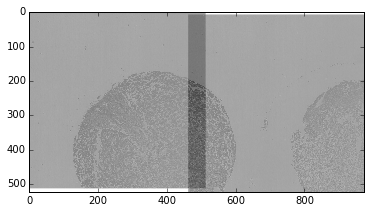

In [5]:
imshow(img1, cmap="gray", alpha=0.5)
# extent=(left, right, bottom, top)
imgplot = imshow(img2, cmap="gray", alpha=0.5, extent=(x_offset, x_end, y_end, y_offset))
ax = imgplot.axes
ax.set_ylim(y_end, 0)
ax.set_xlim(0, x_end)

In [150]:
x_offset, y_offset

(461, 10)

In [156]:
from math import atan2, pi

In [157]:
atan2(10, x_offset - 256)/pi * 180

2.7927023657132835

In [131]:
from skimage.viewer.plugins import Plugin
from skimage.viewer.widgets import Slider, Button
from skimage.viewer.canvastools import RectangleTool

class Offset(Plugin):
    name = "Offset"

    def __init__(self, img, **kwargs):
        super(Offset, self).__init__(**kwargs)
        self.image = img
    
    
    def attach(self, iv):
        super(Offset, self).attach(iv)
        self.ax = iv.ax
        self.fig = iv.fig
        self.canvas = iv.canvas
        self.orig_shape = iv.original_image.shape
        y,x = self.orig_shape

        offset, _ = translation(iv.original_image, self.image)
        yoff, xoff = offset
        xoff %= self.orig_shape[1]

        self.y_offset = Slider('y_offset', low=-y, high=y,
                               value_type='int', value=yoff)
        self.add_widget(self.y_offset)
        
        self.x_offset = Slider('x_offset', low=-x, high=x, 
                               value_type='int', value=xoff)
        self.add_widget(self.x_offset)

        self.zoom_artist = RectangleTool(iv, on_enter=self.zoom)
        self.artists.append(self.zoom_artist)
        self.reset_btn = Button('Reset', self.reset)
        self.add_widget(self.reset_btn)

        self.display_btn = Button('Display', self.display)
        self.add_widget(self.display_btn)

        
    def display(self):
        print('displaying overlay', flush=True)
        y,x = self.orig_shape
        yoff, xoff = self.y_offset.val, self.x_offset.val
        y_end = y + yoff
        x_end = x + xoff
        extent = xoff, x_end, y_end, yoff

        # extent=(left, right, bottom, top)
        if not getattr(self, 'imgplot', None):
            self.imgplot = imshow(self.image, cmap="gray", 
                                  alpha=0.5,
                                  extent=extent)
            self.ax.add_image(self.imgplot)

        self.ax.set_ylim(y_end, 0)
        self.ax.set_xlim(0, x_end)
        self.canvas.draw()
        
    def zoom(self, extents):
        xmin, xmax, ymin, ymax = extents
        self.ax.set_xlim(xmin, xmax)
        self.ax.set_ylim(ymax, ymin)
        self.canvas.draw()
    
    
    def reset(self):
        ymax, xmax = self.orig_shape
        ymax += self.y_offset.val
        xmax += self.x_offset.val
        self.ax.set_xlim(0, xmax)
        self.ax.set_ylim(ymax, 0)
        self.canvas.draw()

In [142]:
from skimage.viewer.viewers import ImageViewer

In [143]:
v = ImageViewer(img1)

In [144]:
offset = Offset(img2)

In [145]:
v += offset

In [146]:
v.show();

displaying overlay


In [148]:
offset.canvas.x()

RuntimeError: Internal C++ object (FigureCanvas) already deleted.

In [18]:
offset.x_off

RuntimeError: Internal C++ object (PySide.QtGui.QSlider) already deleted.

In [176]:
img_list = [('asdf', 0,0), ('fdas',0,1)]

In [177]:
class ImageCollection:
    def __init__(self, image_list):
        self.image_list = image_list

    def image(self, row, col):
        return next((img[0] for img in self.image_list
                     if img[1] == row and img[2] == col), '')


In [178]:
images = ImageCollection(img_list)

In [182]:
images.image(1,1)

''

In [210]:
l = [[],[]]

In [211]:
l[0].append((1,4,5,6))
l[0].append((2,4,5,6))
l[1].append((3,4,5,6))
#l[1].append((3,4,5,6))

In [212]:
a = np.array(l)

In [213]:
a.shape

(2,)

In [216]:
from skimage.io import imread

In [218]:
imread?

In [219]:
import skimage.io as io

In [220]:

io.available_plugins

{'fits': ['imread', 'imread_collection'],
 'freeimage': ['imread', 'imsave', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'gtk': ['imshow'],
 'imread': ['imread', 'imsave', 'imread_collection'],
 'matplotlib': ['imshow', 'imread', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'test': ['imsave', 'imshow', 'imread', 'imread_collection'],
 'tifffile': ['imread', 'imsave', 'imread_collection']}

In [225]:
io.plugin_order()

{'_app_show': ['matplotlib'],
 'imread': ['pil', 'matplotlib'],
 'imread_collection': ['pil', 'matplotlib'],
 'imsave': ['pil'],
 'imshow': ['matplotlib']}

In [226]:
from PIL import Image